<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code



## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature

X = torch.arange(0, 1, 0.001)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 1000
Number of y samples: 1000
First 10 X & y samples:
X: tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
        0.0090])
y: tensor([0.9000, 0.9003, 0.9006, 0.9009, 0.9012, 0.9015, 0.9018, 0.9021, 0.9024,
        0.9027])


In [4]:
# Split the data into training and testing
# X_train = X[0:799]
# y_train = y[0:799]

X_train = torch.rand(799)
y_train = weight * X_train + bias

# X_test = X[800:]
# y_test = y[800:]

X_test = torch.rand(200)
y_test = weight * X_test + bias

In [5]:
X.size()

torch.Size([1000])

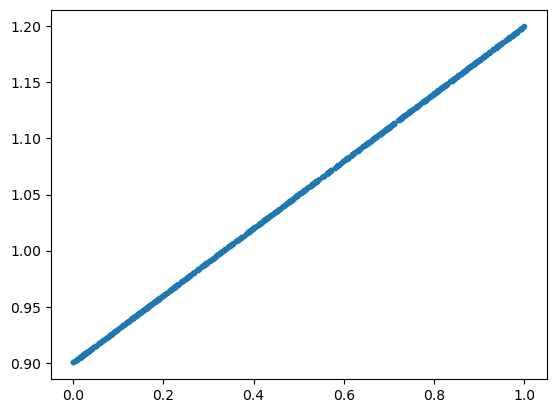

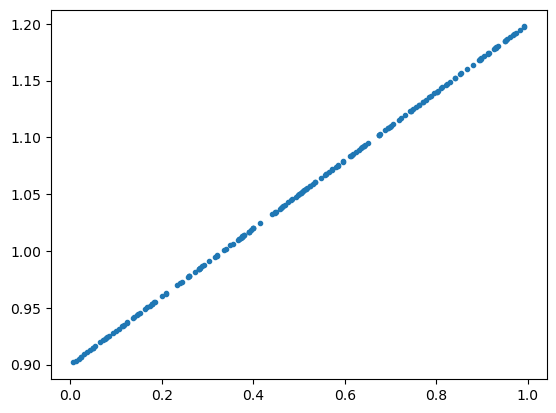

In [6]:
# Plot the training and testing data 

plt.plot(X_train, y_train, '.')
plt.show()

plt.plot(X_test, y_test, '.')
plt.show()


In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions.detach().numpy(), c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

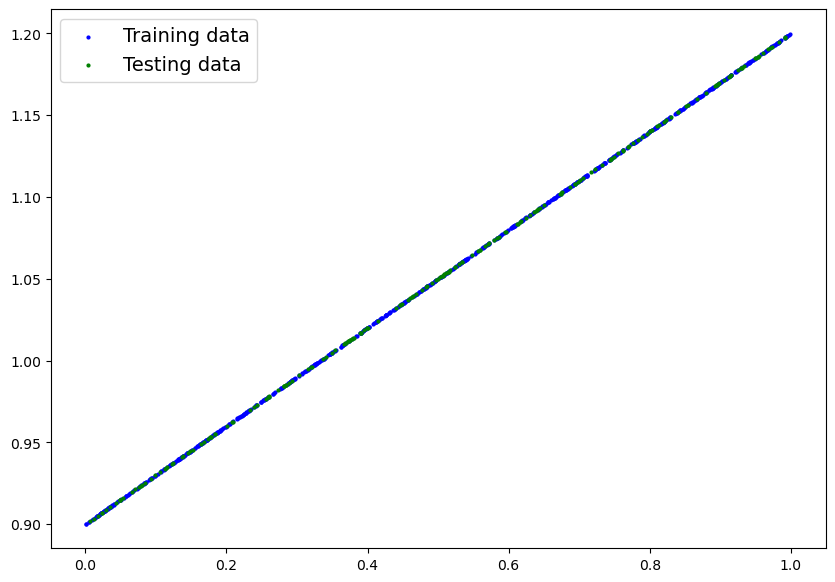

In [8]:
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [9]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearModel1(nn.Module):
    def __init__(self) -> None:
        super(LinearModel1, self).__init__()
        
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
        


In [10]:
model1 = LinearModel1()
list(model1.parameters())


[Parameter containing:
 tensor([0.9151], requires_grad=True),
 Parameter containing:
 tensor([0.5685], requires_grad=True)]

In [11]:
# 1. Set the model in evaluation mode
model1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y1_test = model1(X_test)
y1_test

tensor([1.2486, 1.4374, 1.1637, 1.1282, 0.7914, 1.0799, 0.9789, 1.0396, 0.5900,
        1.1871, 0.9346, 0.9064, 1.1138, 0.7045, 1.0927, 1.0779, 0.5742, 0.9161,
        0.8801, 1.2600, 0.6129, 0.9057, 1.0361, 0.9940, 0.9165, 0.6454, 0.9110,
        1.3009, 0.6403, 0.8611, 1.1848, 0.6650, 1.0417, 0.5901, 1.1587, 1.4425,
        0.8182, 1.3103, 1.2387, 0.6732, 1.3622, 0.6011, 0.5791, 1.2502, 1.0867,
        0.7308, 0.6933, 0.9345, 1.1548, 1.0304, 1.0256, 0.8363, 0.9143, 1.0907,
        1.2249, 1.3374, 1.4034, 1.4053, 0.9767, 0.6131, 1.3893, 1.3851, 1.0704,
        0.9344, 0.8286, 1.0118, 1.4384, 0.9970, 1.4761, 1.1029, 0.9094, 1.4589,
        0.7311, 0.9248, 0.8929, 1.0479, 0.9771, 1.4755, 0.8067, 0.8461, 1.2728,
        1.0230, 1.2537, 0.7596, 1.1457, 1.2073, 1.4184, 1.3730, 0.9124, 0.9719,
        0.8027, 1.0343, 0.8622, 0.9038, 1.0394, 0.7020, 1.1855, 0.6815, 1.2037,
        1.1131, 1.2499, 0.9256, 1.0537, 0.6129, 1.3506, 0.9476, 0.8256, 1.2652,
        1.0485, 0.8261, 0.7590, 1.1404, 

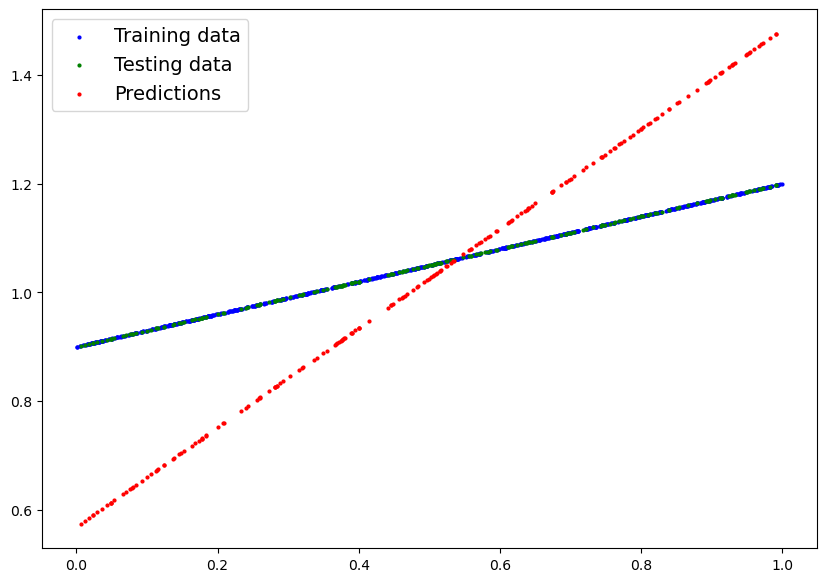

In [12]:
plot_predictions(predictions=y1_test)

In [13]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearModel2(nn.Module):
    def __init__(self) -> None:
        super(LinearModel2, self).__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=1)
        
    
    def forward(self, x):
        # x = nn.Flatten(x)
        return self.layer1(x)
        


In [14]:
# Instantiate the model and put it to the target device

model2 = LinearModel2()
list(model2.parameters())

[Parameter containing:
 tensor([[0.1353]], requires_grad=True),
 Parameter containing:
 tensor([-0.6003], requires_grad=True)]

In [15]:
# 1. Set the model in evaluation mode
model2.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y2_test = model2(X_test.reshape(200,1))
y2_test

tensor([[-0.4997],
        [-0.4718],
        [-0.5123],
        [-0.5175],
        [-0.5673],
        [-0.5247],
        [-0.5396],
        [-0.5306],
        [-0.5971],
        [-0.5088],
        [-0.5462],
        [-0.5503],
        [-0.5197],
        [-0.5802],
        [-0.5228],
        [-0.5250],
        [-0.5995],
        [-0.5489],
        [-0.5542],
        [-0.4980],
        [-0.5937],
        [-0.5504],
        [-0.5311],
        [-0.5374],
        [-0.5488],
        [-0.5889],
        [-0.5496],
        [-0.4920],
        [-0.5897],
        [-0.5570],
        [-0.5092],
        [-0.5860],
        [-0.5303],
        [-0.5971],
        [-0.5130],
        [-0.4710],
        [-0.5634],
        [-0.4906],
        [-0.5012],
        [-0.5848],
        [-0.4829],
        [-0.5955],
        [-0.5987],
        [-0.4995],
        [-0.5237],
        [-0.5763],
        [-0.5819],
        [-0.5462],
        [-0.5136],
        [-0.5320],
        [-0.5327],
        [-0.5607],
        [-0.

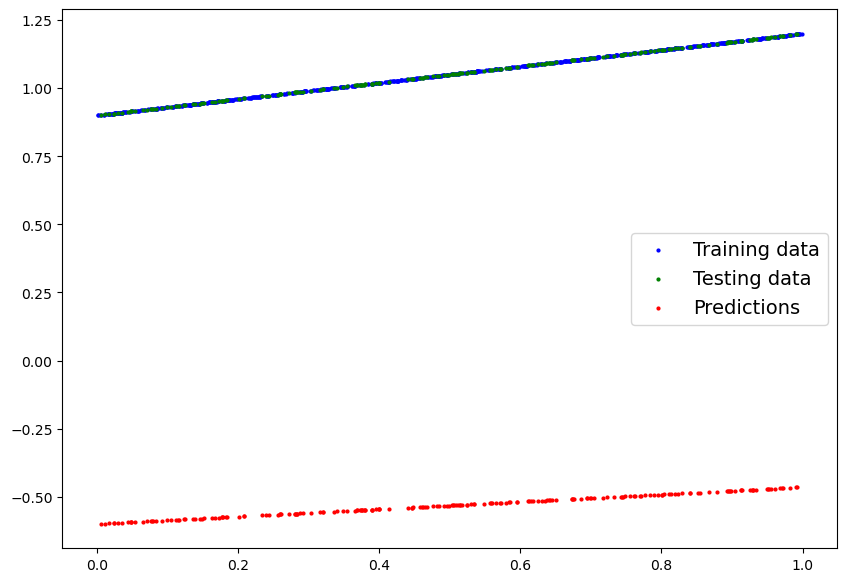

In [16]:
plot_predictions(predictions=y2_test)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [17]:
# Create the loss function and optimizer
loss_func = nn.L1Loss()
loss_func2 = nn.MSELoss()
optimizer1 = torch.optim.SGD(params = model1.parameters())
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)

In [18]:
params = list(model1.parameters())
params

[Parameter containing:
 tensor([0.9151], requires_grad=True),
 Parameter containing:
 tensor([0.5685], requires_grad=True)]

In [19]:
list(model2.parameters())

[Parameter containing:
 tensor([[0.1353]], requires_grad=True),
 Parameter containing:
 tensor([-0.6003], requires_grad=True)]

In [20]:
# Training loop


# Train model for 300 epochs
epochs = 20000

# Send data to target device



for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model1.train()
  model2.train()
  

  # 1. Forward pass
  y1_train = model1(X_train)
  y2_train = model2(X_train.reshape(799,1))

  # 2. Calculate loss
  loss1 = loss_func(y1_train, y_train)
  loss2 = loss_func2(y2_train, y_train)

  # 3. Zero gradients
  optimizer1.zero_grad()
  optimizer2.zero_grad()

  # 4. Backpropagation
  loss1.backward()
  loss2.backward()
  

  # 5. Step the optimizer
  optimizer1.step()
  optimizer2.step()
  
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer2, step_size=50, gamma=0.1)

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
      model1.eval()
      model2.eval()
      
      # 1. Forward pass
      y1_test = model1(X_test)
      y2_test = model2(X_test.reshape(200,1))
      
      # 2. Calculate test loss
      test_loss1 = loss_func(y1_test, y_test)
      test_loss2 = loss_func2(y2_test, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss1:.3f} | Test loss: {test_loss1:.3f}")
      print(f"Epoch: {epoch} | Train loss: {loss2:.3f} | Test loss: {test_loss2:.3f}")

/home/gs/anaconda3/envs/zhawenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([799])) that is different to the input size (torch.Size([799, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/gs/anaconda3/envs/zhawenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 0.158 | Test loss: 0.149
Epoch: 0 | Train loss: 2.515 | Test loss: 2.391
Epoch: 20 | Train loss: 0.157 | Test loss: 0.148
Epoch: 20 | Train loss: 0.936 | Test loss: 0.891
Epoch: 40 | Train loss: 0.156 | Test loss: 0.147
Epoch: 40 | Train loss: 0.370 | Test loss: 0.352
Epoch: 60 | Train loss: 0.155 | Test loss: 0.146
Epoch: 60 | Train loss: 0.167 | Test loss: 0.158
Epoch: 80 | Train loss: 0.154 | Test loss: 0.145
Epoch: 80 | Train loss: 0.092 | Test loss: 0.087
Epoch: 100 | Train loss: 0.153 | Test loss: 0.144
Epoch: 100 | Train loss: 0.064 | Test loss: 0.060
Epoch: 120 | Train loss: 0.152 | Test loss: 0.143
Epoch: 120 | Train loss: 0.053 | Test loss: 0.049
Epoch: 140 | Train loss: 0.151 | Test loss: 0.142
Epoch: 140 | Train loss: 0.047 | Test loss: 0.044
Epoch: 160 | Train loss: 0.150 | Test loss: 0.142
Epoch: 160 | Train loss: 0.044 | Test loss: 0.041
Epoch: 180 | Train loss: 0.149 | Test loss: 0.141
Epoch: 180 | Train loss: 0.042 | Test loss: 0.039
Epoch: 200 |

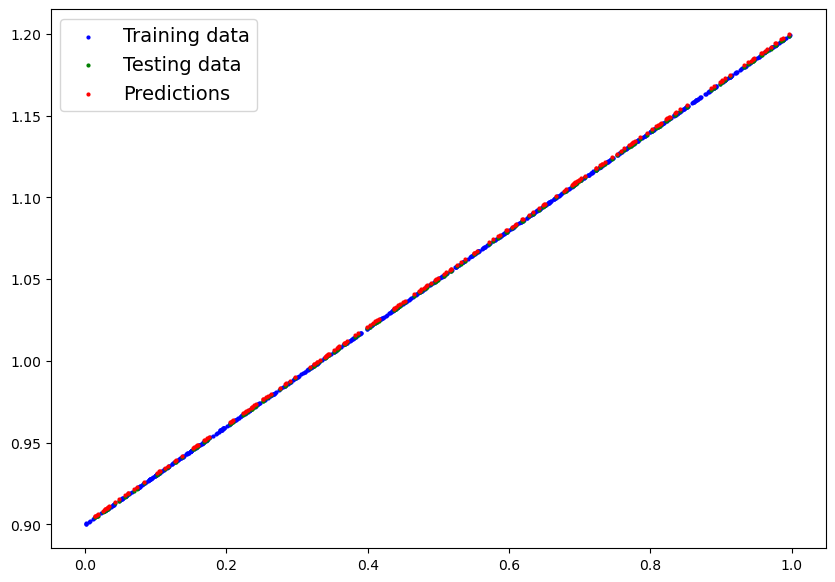

In [133]:
plot_predictions(predictions=y1_test)

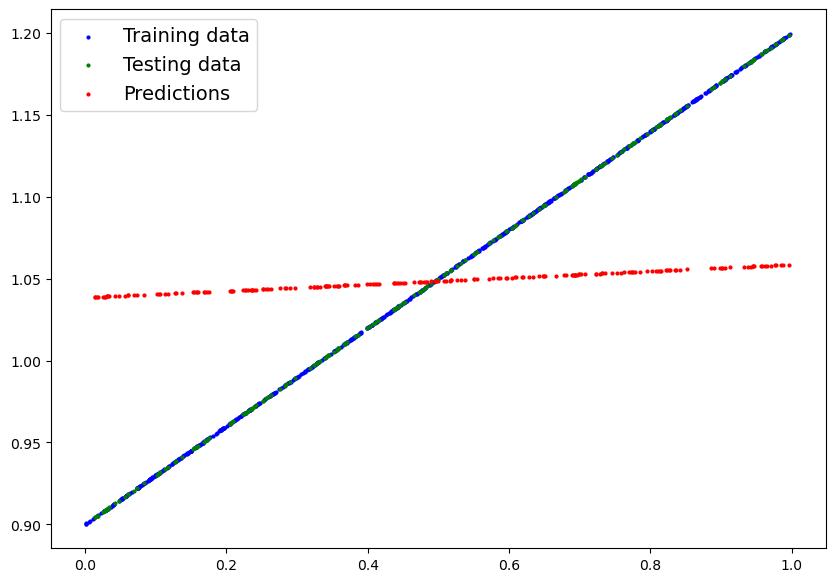

In [134]:
plot_predictions(predictions=y2_test)

In [79]:
list(model1.parameters())

[Parameter containing:
 tensor([0.3001], requires_grad=True),
 Parameter containing:
 tensor([0.8995], requires_grad=True)]

In [80]:

list(model2.parameters())

[Parameter containing:
 tensor([[0.1352]], requires_grad=True),
 Parameter containing:
 tensor([0.9632], requires_grad=True)]

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model


In [ ]:
# Plot the predictions (these may need to be on a specific device)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 


# 2. Create model save path 

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
